In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [8]:
from zipfile import ZipFile

In [10]:
uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"

zip_path = tf.keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()

csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

13568290/13568290 [==============================] - 4s 0us/step


In [11]:
# zip_path = tf.keras.utils.get_file(
#             origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.zip',
#             fname='jena_climate_2009_2016.zip',
#             extract=True)

# csv_path = os.path.splittext(zip_path)

# df = pd.read_csv(csv_path)

In [12]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [14]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [15]:
temp = df['T (degC)']
temp

Date Time
2009-01-01 00:10:00   -8.02
2009-01-01 00:20:00   -8.41
2009-01-01 00:30:00   -8.51
2009-01-01 00:40:00   -8.31
2009-01-01 00:50:00   -8.27
                       ... 
2016-12-31 23:20:00   -4.05
2016-12-31 23:30:00   -3.35
2016-12-31 23:40:00   -3.16
2016-12-31 23:50:00   -4.23
2017-01-01 00:00:00   -4.82
Name: T (degC), Length: 420551, dtype: float64

In [18]:
#Converting a forrecasting problem to supervised learning problem

def df_to_X_y(df, window_size=5):
    #convert DataFrmae to numpy
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range (len(df_as_np)-window_size):
        row = [[a]for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [19]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((420546, 5, 1), (420546,))

In [20]:
# split dataset
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [21]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (355546, 5, 1), (355546,))

In [22]:
#Building the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [26]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [27]:
# CheckPoints (To specify training callbacks)
cp = ModelCheckpoint('model1/', save_best_only=True)

In [28]:
model1.compile(loss=MeanSquaredError(),
              optimizer=Adam(learning_rate=1e-4),
              metrics=[RootMeanSquaredError()])

In [30]:
#fit the model
model1.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=10, callbacks=[cp])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 36.8379 - root_mean_squared_error: 6.0694

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 21s 9ms/step - loss: 36.8185 - root_mean_squared_error: 6.0678 - val_loss: 0.3108 - val_root_mean_squared_error: 0.5575
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 1.3814 - root_mean_squared_error: 1.1753

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 1.3789 - root_mean_squared_error: 1.1743 - val_loss: 0.1238 - val_root_mean_squared_error: 0.3519
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2462 - root_mean_squared_error: 0.4962

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.2462 - root_mean_squared_error: 0.4962 - val_loss: 0.0830 - val_root_mean_squared_error: 0.2881
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.1022 - root_mean_squared_error: 0.3198

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 18s 9ms/step - loss: 0.1022 - root_mean_squared_error: 0.3197 - val_loss: 0.0676 - val_root_mean_squared_error: 0.2599
Epoch 5/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0678 - root_mean_squared_error: 0.2603

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.0677 - root_mean_squared_error: 0.2602 - val_loss: 0.0599 - val_root_mean_squared_error: 0.2446
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0559 - root_mean_squared_error: 0.2365

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 0.0559 - root_mean_squared_error: 0.2365 - val_loss: 0.0549 - val_root_mean_squared_error: 0.2343
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0505 - root_mean_squared_error: 0.2246

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 0.0505 - root_mean_squared_error: 0.2247 - val_loss: 0.0496 - val_root_mean_squared_error: 0.2227
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0473 - root_mean_squared_error: 0.2174

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 0.0473 - root_mean_squared_error: 0.2174 - val_loss: 0.0485 - val_root_mean_squared_error: 0.2203
Epoch 9/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0457 - root_mean_squared_error: 0.2137

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 27s 15ms/step - loss: 0.0456 - root_mean_squared_error: 0.2136 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2137
Epoch 10/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0445 - root_mean_squared_error: 0.2110

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0445 - root_mean_squared_error: 0.2110 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2119


In [32]:
# load the model
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [33]:
# Make pandas DataFrame
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={"Train_Prediction":train_predictions, "Actuals": y_train})
train_results

1875/1875 [==============================] - 8s 4ms/step


,Train_Prediction,Actuals
0,-8.203081,-8.05
1,-7.989884,-7.62
2,-7.485081,-7.62
3,-7.471513,-7.91
4,-7.931944,-8.43
...,...,...
59995,1.812659,1.82
59996,1.821584,1.88
59997,1.889651,1.74
59998,1.714558,1.64


In [34]:
#Plot and see
import matplotlib.pyplot as plt

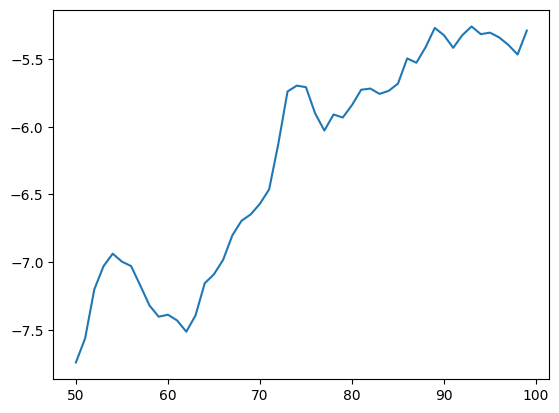

In [36]:
plt.plot(train_results['Train_Prediction'][50:100])

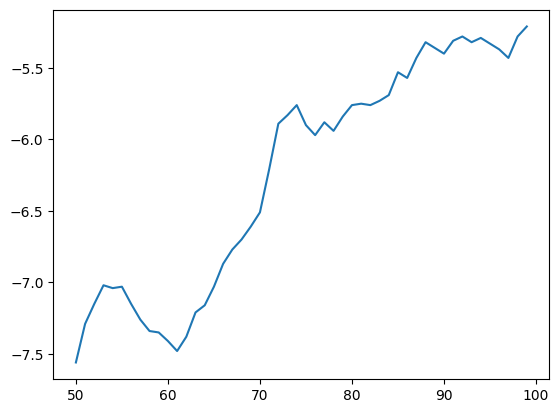

In [37]:
plt.plot(train_results['Actuals'][50:100])

In [45]:
# Check on Validation set
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={"Val_predictions":val_predictions, "Actuals": y_val})
val_results

157/157 [==============================] - 1s 3ms/step


,Val_predictions,Actuals
0,1.580793,1.57
1,1.552584,1.49
2,1.470828,1.38
3,1.354107,1.26
4,1.226135,1.20
...,...,...
4995,8.596642,8.78
4996,9.035819,8.91
4997,9.022267,8.98
4998,9.098536,9.19


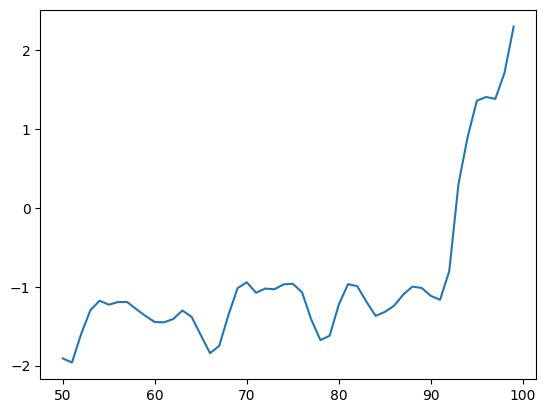

In [46]:
plt.plot(val_results['Val_predictions'][50:100])

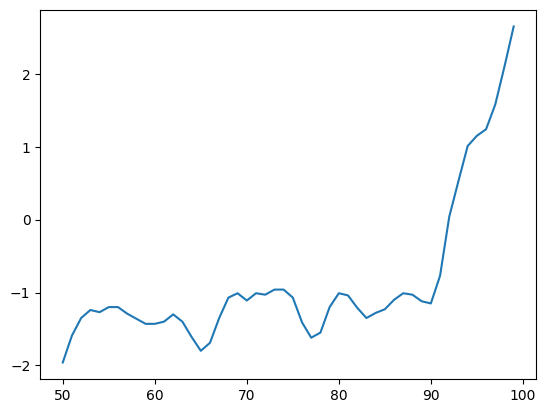

In [47]:
plt.plot(val_results['Actuals'][50:100])

In [48]:
# Check on test data
test_prediction = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data = {"Test_Prediction": test_prediction, "Actuals": y_test})
test_results

11111/11111 [==============================] - 47s 4ms/step


,Test_Prediction,Actuals
0,8.882892,9.07
1,9.205989,9.11
2,9.132110,8.88
3,8.748895,8.76
4,8.759366,8.92
...,...,...
355541,-3.829983,-4.05
355542,-4.089564,-3.35
355543,-3.341195,-3.16
355544,-2.983913,-4.23


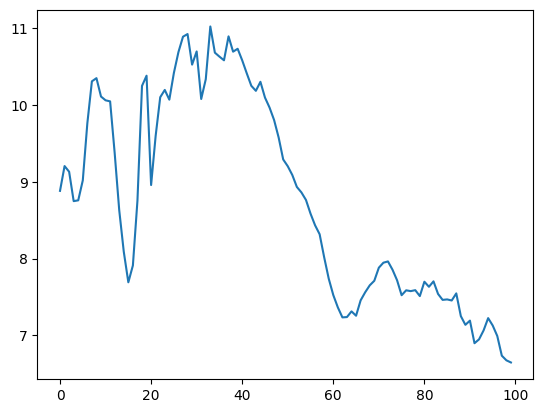

In [49]:
plt.plot(test_results["Test_Prediction"][:100])

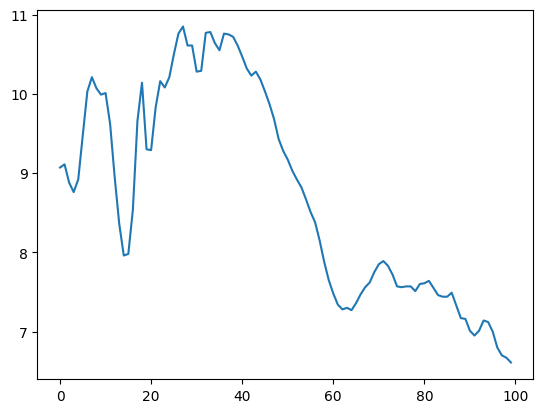

In [50]:
plt.plot(test_results["Actuals"][:100])